In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import pandas as pd

In [8]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

In [71]:
df = pd.read_csv("C:/Users/Administrator/data/omniscient-reader_Episode_en_27.csv")
df.head()

,Episode,Date,Review
0,27,"Nov 4, 2020",I love watching Dokja go from human and concer...
1,27,"Nov 4, 2020",I love Gilyeong so much! I’m glad that he is i...
2,27,"Nov 4, 2020",Gilyeong drawing comfort from Dokja :’) it’s c...
3,27,"Nov 4, 2020",I feel like dokja has a similar trauma to gily...
4,27,"Nov 4, 2020","if you are reading this for free, hello, it is..."


In [72]:
# 문자열 아닌 데이터 모두 제거
df_review = [review for review in df['Review'] if type(review) is str]
df_review

['I love watching Dokja go from human and concerned about a traumatized child to protagonist who is analyzing a murdery-girl',
 'I love Gilyeong so much! I’m glad that he is in their group and can rely on Dokja. He’s also a great addition to the team, very smart and brave.',
 'Gilyeong drawing comfort from Dokja :’) it’s clear he seems to relate to him/is sympathetic in some way',
 "I feel like dokja has a similar trauma to gilyeong that's why he sympathizes with him so much, but on a lighter note I would gladly die for gilyeong like he's so precious for this cruel world",
 "if you are reading this for free, hello, it is currently November 3rd, this chapter just released and everyone who also is with me today has made it to the point in the fast pass where we can't turn back. Please send help.",
 'gilyeong 🥺 I love this boy with my entire heart,,,also it looks like his mother was pretty abusive to him.. time to get out my bat :)',
 "Y'know I noticed that Dokja pat's Gilyeong's head qui

In [73]:
#구두점등 특수문자 [!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]  제거

import string
translator = str.maketrans('','',string.punctuation)
result = str(df_review).translate(translator)
result = result.lower()
print(result)

i love watching dokja go from human and concerned about a traumatized child to protagonist who is analyzing a murderygirl i love gilyeong so much i’m glad that he is in their group and can rely on dokja he’s also a great addition to the team very smart and brave gilyeong drawing comfort from dokja ’ it’s clear he seems to relate to himis sympathetic in some way i feel like dokja has a similar trauma to gilyeong thats why he sympathizes with him so much but on a lighter note i would gladly die for gilyeong like hes so precious for this cruel world if you are reading this for free hello it is currently november 3rd this chapter just released and everyone who also is with me today has made it to the point in the fast pass where we cant turn back please send help gilyeong 🥺 i love this boy with my entire heartalso it looks like his mother was pretty abusive to him time to get out my bat  yknow i noticed that dokja pats gilyeongs head quite often definitely took rereading the comic to notic

In [74]:
# 반복어 삭제
from soynlp.normalizer import *

result = emoticon_normalize(result, num_repeats=2)
result

'i love watching dokja go from human and concerned about a traumatized child to protagonist who is analyzing a murderygirl i love gilyeong so much i’m glad that he is in their group and can rely on dokja he’s also a great addition to the team very smart and brave gilyeong drawing comfort from dokja ’ it’s clear he seems to relate to himis sympathetic in some way i feel like dokja has a similar trauma to gilyeong thats why he sympathizes with him so much but on a lighter note i would gladly die for gilyeong like hes so precious for this cruel world if you are reading this for free hello it is currently november 3rd this chapter just released and everyone who also is with me today has made it to the point in the fast pass where we cant turn back please send help gilyeong 🥺 i love this boy with my entire heartalso it looks like his mother was pretty abusive to him time to get out my bat yknow i noticed that dokja pats gilyeongs head quite often definitely took rereading the comic to notic

In [75]:
# 이모티콘 제거
result = result.encode('utf-8').decode('ascii', 'ignore') 
result

'i love watching dokja go from human and concerned about a traumatized child to protagonist who is analyzing a murderygirl i love gilyeong so much im glad that he is in their group and can rely on dokja hes also a great addition to the team very smart and brave gilyeong drawing comfort from dokja  its clear he seems to relate to himis sympathetic in some way i feel like dokja has a similar trauma to gilyeong thats why he sympathizes with him so much but on a lighter note i would gladly die for gilyeong like hes so precious for this cruel world if you are reading this for free hello it is currently november 3rd this chapter just released and everyone who also is with me today has made it to the point in the fast pass where we cant turn back please send help gilyeong  i love this boy with my entire heartalso it looks like his mother was pretty abusive to him time to get out my bat yknow i noticed that dokja pats gilyeongs head quite often definitely took rereading the comic to notice and

In [76]:
result = str(result)

In [99]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 
stop_words.update(['im','constellations','oh','would','like','see','one','know','read','cant','get'])

word_tokens = word_tokenize(result)

Result = []
for w in word_tokens: 
    if w not in stop_words: 
        Result.append(w) 

print(word_tokens,'\n')
print(Result) 

['i', 'love', 'watching', 'dokja', 'go', 'from', 'human', 'and', 'concerned', 'about', 'a', 'traumatized', 'child', 'to', 'protagonist', 'who', 'is', 'analyzing', 'a', 'murderygirl', 'i', 'love', 'gilyeong', 'so', 'much', 'im', 'glad', 'that', 'he', 'is', 'in', 'their', 'group', 'and', 'can', 'rely', 'on', 'dokja', 'hes', 'also', 'a', 'great', 'addition', 'to', 'the', 'team', 'very', 'smart', 'and', 'brave', 'gilyeong', 'drawing', 'comfort', 'from', 'dokja', 'its', 'clear', 'he', 'seems', 'to', 'relate', 'to', 'himis', 'sympathetic', 'in', 'some', 'way', 'i', 'feel', 'like', 'dokja', 'has', 'a', 'similar', 'trauma', 'to', 'gilyeong', 'thats', 'why', 'he', 'sympathizes', 'with', 'him', 'so', 'much', 'but', 'on', 'a', 'lighter', 'note', 'i', 'would', 'gladly', 'die', 'for', 'gilyeong', 'like', 'hes', 'so', 'precious', 'for', 'this', 'cruel', 'world', 'if', 'you', 'are', 'reading', 'this', 'for', 'free', 'hello', 'it', 'is', 'currently', 'november', '3rd', 'this', 'chapter', 'just', 'rele

In [100]:
# 빈도 탐색
cnt = Counter(Result)
vocab_sorted = sorted(cnt.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted[:20])

[('gilyeong', 355), ('dokja', 263), ('love', 126), ('constellation', 88), ('dokjas', 64), ('coins', 61), ('webtoon', 60), ('story', 58), ('jihye', 57), ('really', 54), ('na', 51), ('character', 49), ('kid', 47), ('past', 46), ('even', 46), ('want', 46), ('hes', 45), ('lee', 45), ('much', 44), ('also', 44)]


<Figure size 432x288 with 0 Axes>

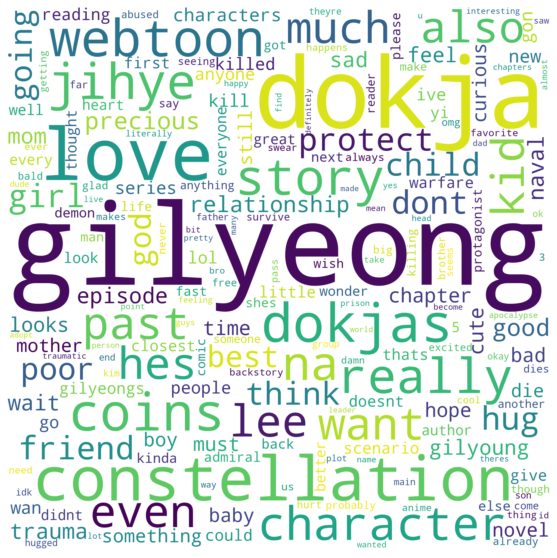

<Figure size 432x288 with 0 Axes>

In [108]:
wc = WordCloud(background_color='white',
#                colormap='Greens',
               width=1000, 
               height=1000, 
               scale=2.0, 
               max_font_size=300)
gen = wc.generate_from_frequencies(cnt)
plt.figure(figsize=(10,10))       
plt.axis('off') 
plt.imshow(wc,interpolation='bilinear')
plt.savefig('(eng)27화워드클라우드.png',dpi=200 ,facecolor='#eeeeee')
plt.figure()

In [102]:
keyword = [word[0] for word in vocab_sorted]
"""
keyword = []
for i in range(len(narray)):
    keyword.append(narray[i][0])
keyword[:10]
"""
keyword[:10]

['gilyeong',
 'dokja',
 'love',
 'constellation',
 'dokjas',
 'coins',
 'webtoon',
 'story',
 'jihye',
 'really']

In [103]:
frequency = [word[1] for word in vocab_sorted]
frequency[:10]

[355, 263, 126, 88, 64, 61, 60, 58, 57, 54]

In [104]:
df = pd.DataFrame(zip(keyword,frequency))
df.columns = ['keyword','frequency']
df = df.set_index(keys= 'keyword', drop=True)
df

,frequency
keyword,
gilyeong,355
dokja,263
love,126
constellation,88
dokjas,64
...,...
setbacks,1
victories,1
standing,1


In [105]:
top10 = df[:10].sort_values(by='frequency',ascending=True)
top10

,frequency
keyword,
really,54
jihye,57
story,58
webtoon,60
coins,61
dokjas,64
constellation,88
love,126
dokja,263


C:\Users\Administrator\AppData\Local\Temp\ipykernel_178728\2251697774.py:7: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.savefig('(eng)27화_Bar.png',dpi=200 ,facecolor='#eeeeee')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_178728\2251697774.py:7: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.savefig('(eng)27화_Bar.png',dpi=200 ,facecolor='#eeeeee')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_178728\2251697774.py:7: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.savefig('(eng)27화_Bar.png',dpi=200 ,facecolor='#eeeeee')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_178728\2251697774.py:7: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  plt.savefig('(eng)27화_Bar.png',dpi=200 ,facecolor='#eeeeee')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_178728\2251697774.py:7: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing 

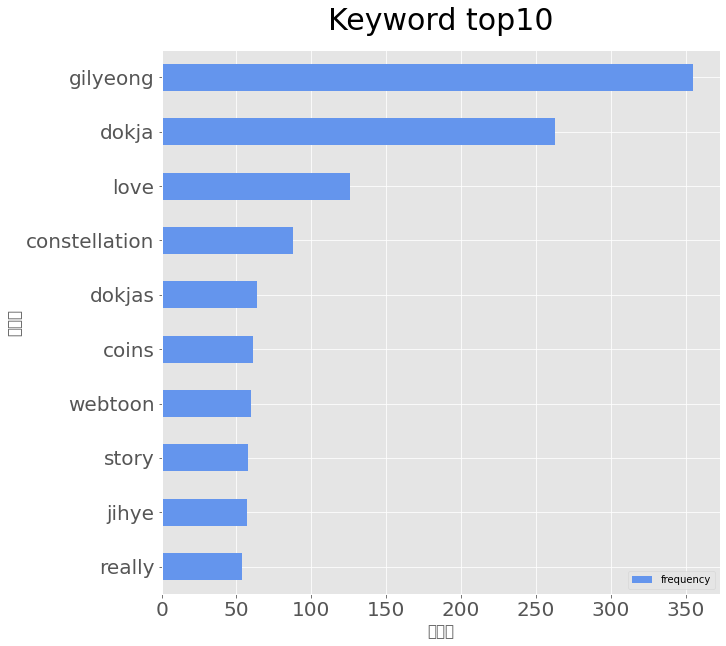

In [109]:
top10.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,10),fontsize=20 )
plt.style.use('ggplot')
plt.title('Keyword top10', fontsize=30 , loc ='center', pad=20)
# plt.legend(loc='best')
plt.xlabel('빈도수', size = 15)
plt.ylabel('키워드', size = 15)
plt.savefig('(eng)27화_Bar.png',dpi=200 ,facecolor='#eeeeee')
plt.show()